In [1]:
import cv2, os
import numpy as np
from PIL import Image

In [2]:
faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [39]:
def ResizeWithAspectRatio(image, width=None, height=None, inter=cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]

    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w * r), height)
    else:
        r = width / float(w)
        dim = (width, int(h * r))

    return cv2.resize(image, dim, interpolation=inter)

In [51]:
def find_face(img_path):
    img = cv2.imread(img_path)
    img = ResizeWithAspectRatio(img, 800, 500)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5, minSize=(20, 20))
    show = True
    print('Количество объектов на фотографии: {0}'.format(len(faces)))
    while show:
        cv2.imshow("result", img)
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        if cv2.waitKey(10) == 27:
            cv2.destroyAllWindows()
            show = False
            break

In [52]:
find_face(r'C:\Users\HP\Pictures\Anne1-1.jpg')

Количество объектов на фотографии: 1


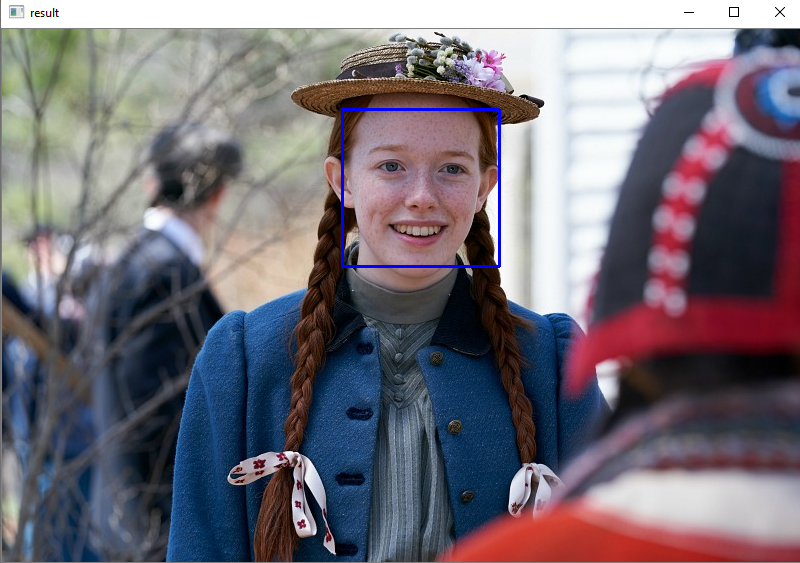

In [53]:
find_face(r'C:\Users\HP\Pictures\Saved Pictures\gcEVWHYaCxc.jpg')

Количество объектов на фотографии: 4


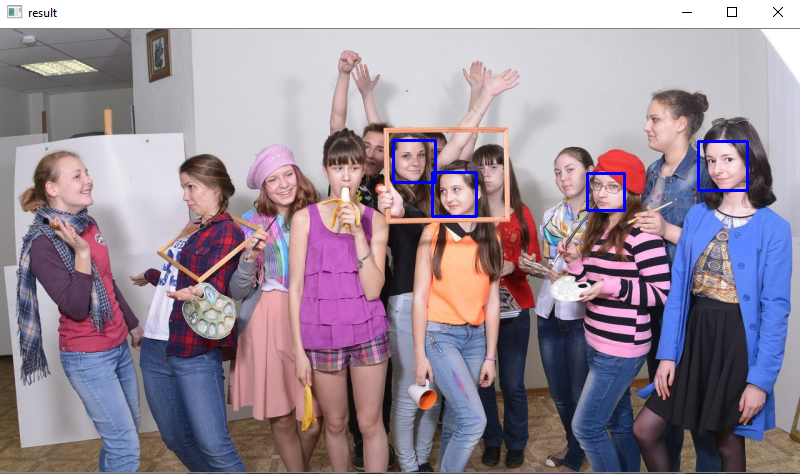

In [54]:
find_face(r'C:\Users\HP\Pictures\Saved Pictures\eY8l8jTmeGY.jpg')

Количество объектов на фотографии: 0


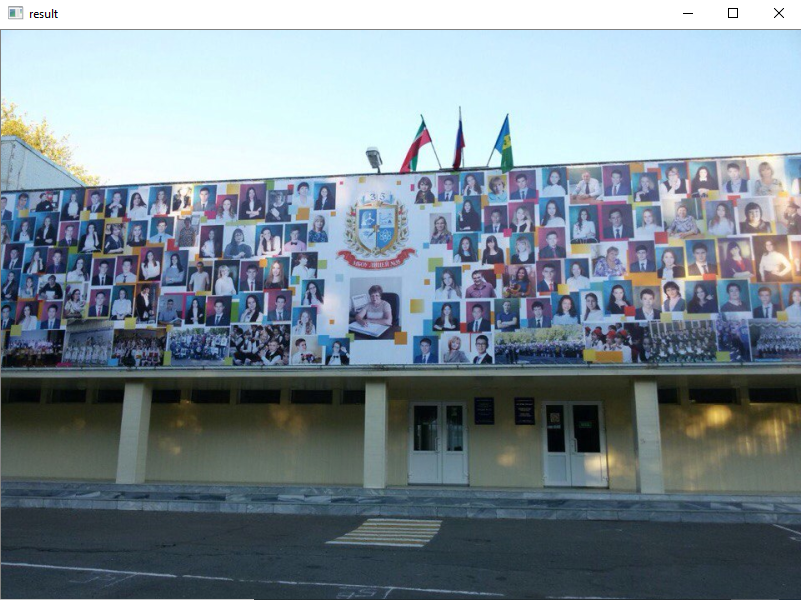

In [55]:
find_face(r'C:\Users\HP\Pictures\12PictureThis-06-mobileMasterAt3x.jpg')

Количество объектов на фотографии: 0


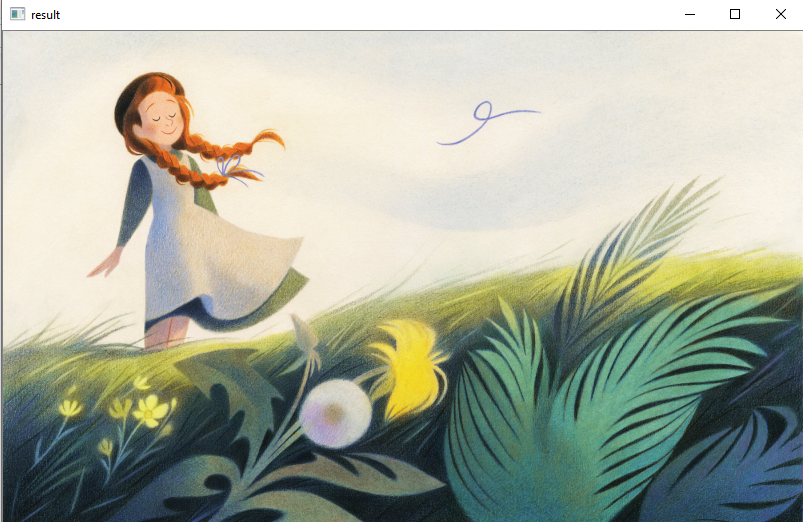